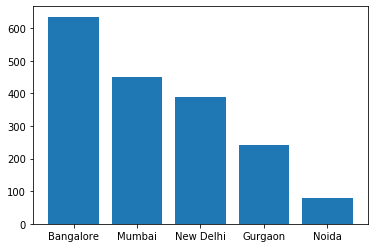

In [30]:
# Suitable Location for the Startup
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# City Name Extraction 
def city_name(name):
    return name.split('/')[0].strip()

# File data to Pandas DataFrame
df_startups = pd.read_csv('startup_funding.csv',encoding='utf-8')
df_startups['CityLocation'].dropna(inplace = True) # Cities without any name removed
df_startups['CityLocation'] = df_startups['CityLocation'].apply(city_name) # First City Name

# Handle Case Sensitive and Proper Name 
df_startups['CityLocation'].replace('Delhi','New Delhi', inplace = True) 
df_startups['CityLocation'].replace('bangalore','Bangalore',inplace = True)
city_funding_count = df_startups['CityLocation'].value_counts()
cities = list(city_funding_count.index) # Get City Names in python list
funding_counts = list(city_funding_count.values)# Get Funding Numbers in python list

# City Locations where startup can be estabilished 
target_locations = {'Bangalore': True,'Mumbai': True,'Gurgaon': True,'Noida': True,'New Delhi': True}

## Optimisation starts (Time Complexity O(N))
actual_city_count = 0 
city_pointer = 0 
total_city = len(cities) 

# Pick only cities which are required
while city_pointer<total_city:
    if cities[city_pointer] in target_locations:
        cities[actual_city_count] = cities[city_pointer]
        funding_counts[actual_city_count] = funding_counts[city_pointer]
        actual_city_count+=1
        
    city_pointer+=1

cities = cities[:actual_city_count]
funding_counts = funding_counts[:actual_city_count]

## Optimisation ends

# Plot Bar-graph
plt.bar(cities,funding_counts)
plt.show()

# Answer: From the Bar graph we can see that location 'Bangalore'
# got maximum number of times funding. So if my friend estabilish his
# startup in this location i.e Bangalore, then there is a high chance of
# getting investment. 
